In [11]:
import xarray as xr
import os
from glob import glob
import datetime
import os
from dask.distributed import Client
import matplotlib.pyplot as plt

In [2]:
client=Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34217,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:39423,Total threads: 1
Dashboard: /proxy/41885/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:34161,


In [3]:
sm_ds_list=[]
rain_ds_list=[]
start_date=datetime.datetime.fromisoformat('2022-02-22T00:00:00')
end_date=datetime.datetime.fromisoformat('2022-02-25T23:59:59')
dt=datetime.timedelta(hours=1)
current_time=start_date
while current_time < end_date:
    day=(current_time - start_date).days + 1
    dir_ts=current_time.replace(hour=int(current_time.hour/6)*6)
    sm_ds_list.append(f"/g/data/hh5/tmp/dr4292/AUS2200_smc_correction/netcdf/day{day}/{dir_ts.strftime('%Y%m%dT%H%MZ')}/aus2200/d0198/RA3/um/umnsa_slv_{current_time.strftime('%Y%m%dT%H%M')}.nc")
    rain_ds_list.append(f"/g/data/hh5/tmp/dr4292/AUS2200_smc_correction/netcdf/day{day}/{dir_ts.strftime('%Y%m%dT%H%MZ')}/aus2200/d0198/RA3/um/umnsa_spec_{current_time.strftime('%Y%m%dT%H%M')}.nc")
    current_time+=dt

In [4]:
sm_ds_s=[ xr.open_dataset(i)['fld_s08i223'] for i in sm_ds_list ]
rain_ds_s=[ xr.open_dataset(i)['fld_s04i201'] for i in rain_ds_list ]

In [6]:
rain_ds=xr.concat(rain_ds_s,'time_0')

In [9]:
sm_ds=xr.concat(sm_ds_s,'time')

In [10]:
sm_ds

<xarray.DataArray 'fld_s08i223' (time: 96, depth: 4, lat: 2120, lon: 2600)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [  9.124603 ,   8.948592 ,  10.463038 , ...,         nan,
                  nan,         nan],
         [  9.865819 ,   9.693409 ,  10.15379  , ...,         nan,
                  nan,         nan],
         [ 11.845709 ,  11.637398 ,  11.352084 , ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [207.26526  , 207.52516  , 207.60097  , ...,         nan,
                  nan,         nan],
         [207.02771  , 206.92319  , 206.43987  , ...,         nan,
                  nan,         nan],
         [203.92433  , 203.73074  , 205.42828  , ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [839.33905  , 845.6816   , 851.0696   , ...,         nan,
                  nan,         nan],
         [851.80774  , 848.1404   , 846.67755  , ...,         nan,
                  nan,         nan],
         [807.46576  , 799.06305  , 838.20483  , ...,         nan,
                  nan,         nan]]]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2022-02-22T01:00:00 ... 2022-02-26
  * lat       (lat) float64 -48.79 -48.77 -48.75 -48.73 ... -6.871 -6.852 -6.832
  * lon       (lon) float64 107.5 107.5 107.6 107.6 ... 158.9 158.9 159.0 159.0
    height    float64 10.0
    height_0  float64 1.5
  * depth     (depth) float64 0.05 0.225 0.675 2.0
Attributes:
    standard_name:    mass_content_of_water_in_soil_layer
    long_name:        SOIL MOISTURE CONTENT IN A LAYER
    units:            kg m-2
    um_stash_source:  m01s08i223
    grid_mapping:     latitude_longitude

In [16]:
lismore={'lat':-28.81,'lon':153.285}
mtisa={'lat':-20.726,'lon':139.493}

Text(0, 0.5, 'Soil Moisture Content [kg m-2]')

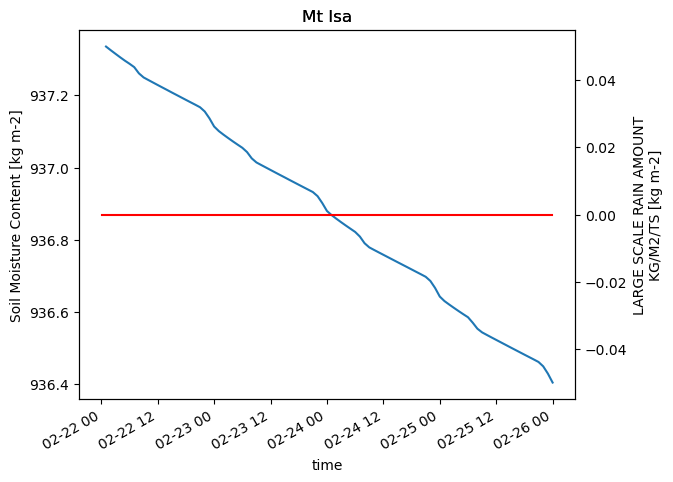

In [30]:
fig, ax1 = plt.subplots()
sm_ds.sel(mtisa,method='nearest').sum('depth').plot(ax=ax1)
ax2=ax1.twinx()
rain_ds.sel(mtisa,method='nearest').plot(ax=ax2,color='red')
ax1.set_title("Mt Isa")
ax2.set_title("Mt Isa")
ax1.set_ylabel("Soil Moisture Content [kg m-2]")